In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_telco = pd.read_csv("./Datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df = pd.read_csv("./Datasets/churn.csv")

In [3]:
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [4]:
df.dtypes

State              object
Account Length      int64
Area Code           int64
Phone              object
Int'l Plan         object
VMail Plan         object
VMail Message       int64
Day Mins          float64
Day Calls           int64
Day Charge        float64
Eve Mins          float64
Eve Calls           int64
Eve Charge        float64
Night Mins        float64
Night Calls         int64
Night Charge      float64
Intl Mins         float64
Intl Calls          int64
Intl Charge       float64
CustServ Calls      int64
Churn?             object
dtype: object

In [5]:
df['Int\'l Plan'] = df['Int\'l Plan'].replace({'no': 0, 'yes': 1})

In [6]:
df['VMail Plan'] = df['VMail Plan'].replace({'no': 0, 'yes': 1})

In [7]:
df.isnull().sum()

State             0
Account Length    0
Area Code         0
Phone             0
Int'l Plan        0
VMail Plan        0
VMail Message     0
Day Mins          0
Day Calls         0
Day Charge        0
Eve Mins          0
Eve Calls         0
Eve Charge        0
Night Mins        0
Night Calls       0
Night Charge      0
Intl Mins         0
Intl Calls        0
Intl Charge       0
CustServ Calls    0
Churn?            0
dtype: int64

In [8]:
df['Churn?'] = df['Churn?'].str.rstrip('.')
df['Churn?'] = df['Churn?'].replace({'False': 0, 'True': 1})

In [9]:
df.columns = df.columns.str.lower()

In [10]:
df.columns.unique()

Index(['state', 'account length', 'area code', 'phone', 'int'l plan',
       'vmail plan', 'vmail message', 'day mins', 'day calls', 'day charge',
       'eve mins', 'eve calls', 'eve charge', 'night mins', 'night calls',
       'night charge', 'intl mins', 'intl calls', 'intl charge',
       'custserv calls', 'churn?'],
      dtype='object')

In [11]:
del df['phone']
del df['area code']
del df['account length']

In [15]:
df.rename(columns = {'churn?': 'churn'}, inplace  = True)

In [16]:
df

,state,int'l plan,vmail plan,vmail message,day mins,day calls,day charge,eve mins,eve calls,eve charge,night mins,night calls,night charge,intl mins,intl calls,intl charge,custserv calls,churn
0,KS,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,WV,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,RI,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,CT,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


## EDA

In [23]:
for col in df.columns:
    print(f"Unique values in column {col}:")
    print(df[col].unique())
    print()

Unique values in column state:
['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']

Unique values in column int'l plan:
[0 1]

Unique values in column vmail plan:
[1 0]

Unique values in column vmail message:
[25 26  0 24 37 27 33 39 30 41 28 34 46 29 35 21 32 42 36 22 23 43 31 38
 40 48 18 17 45 16 20 14 19 51 15 11 12 47  8 44 49  4 10 13 50  9]

Unique values in column day mins:
[265.1 161.6 243.4 ... 321.1 231.1 180.8]

Unique values in column day calls:
[110 123 114  71 113  98  88  79  97  84 137 127  96  70  67 139  66  90
 117  89 112 103  86  76 115  73 109  95 105 121 118  94  80 128  64 106
 102  85  82  77 120 133 135 108  57  83 129  91  92  74  93 101 146  72
  99 104 125  61 100  87 131  65 124 119  52  68 107  47 116 151 126 122
 111 145  78 136 140 148  81  55  69 

In [24]:
df.churn.value_counts()

0    2850
1     483
Name: churn, dtype: int64

In [26]:
df['vmail message'].unique()

array([25, 26,  0, 24, 37, 27, 33, 39, 30, 41, 28, 34, 46, 29, 35, 21, 32,
       42, 36, 22, 23, 43, 31, 38, 40, 48, 18, 17, 45, 16, 20, 14, 19, 51,
       15, 11, 12, 47,  8, 44, 49,  4, 10, 13, 50,  9])

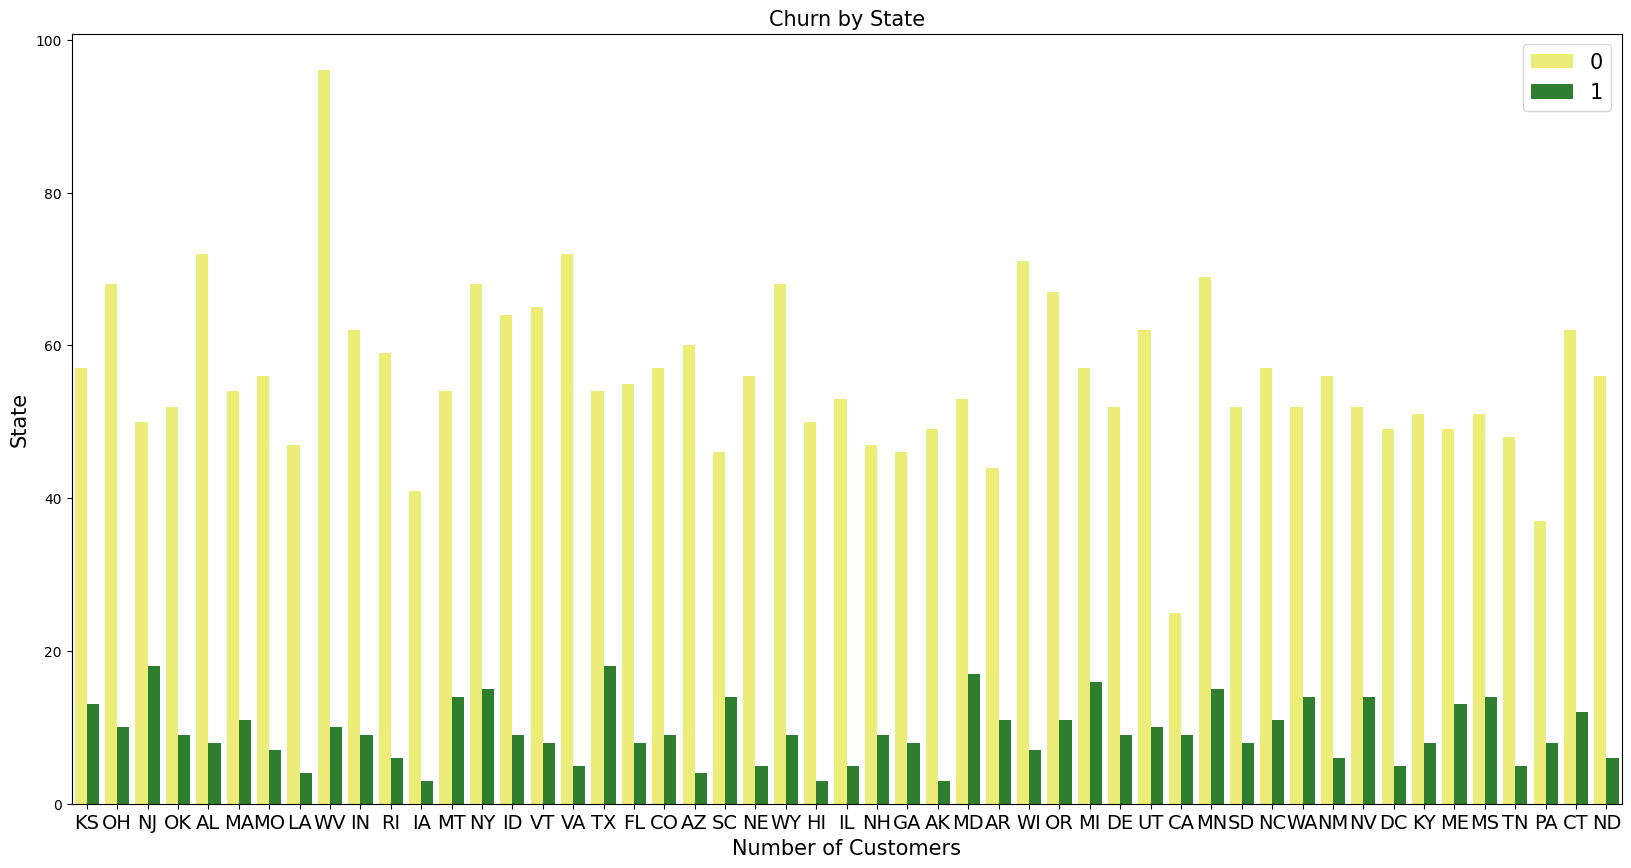

In [55]:
colors = [(255/255, 255/255, 102/255, 1), (34/255, 139/255, 34/255, 1)]
fig, ax =plt.subplots(figsize = (20,10))
sns.countplot(x = 'state', hue = 'churn', data = df, palette =colors)
plt.title('Churn by State', fontsize=15)
plt.xlabel('Number of Customers', fontsize=15)
plt.ylabel('State', fontsize=15)
plt.legend(fontsize=15)
plt.xticks(fontsize = 14)
# show the plot
plt.show()

In [59]:
df.rename(columns = {'int\'l plan': 'intl plan'}, inplace  = True)

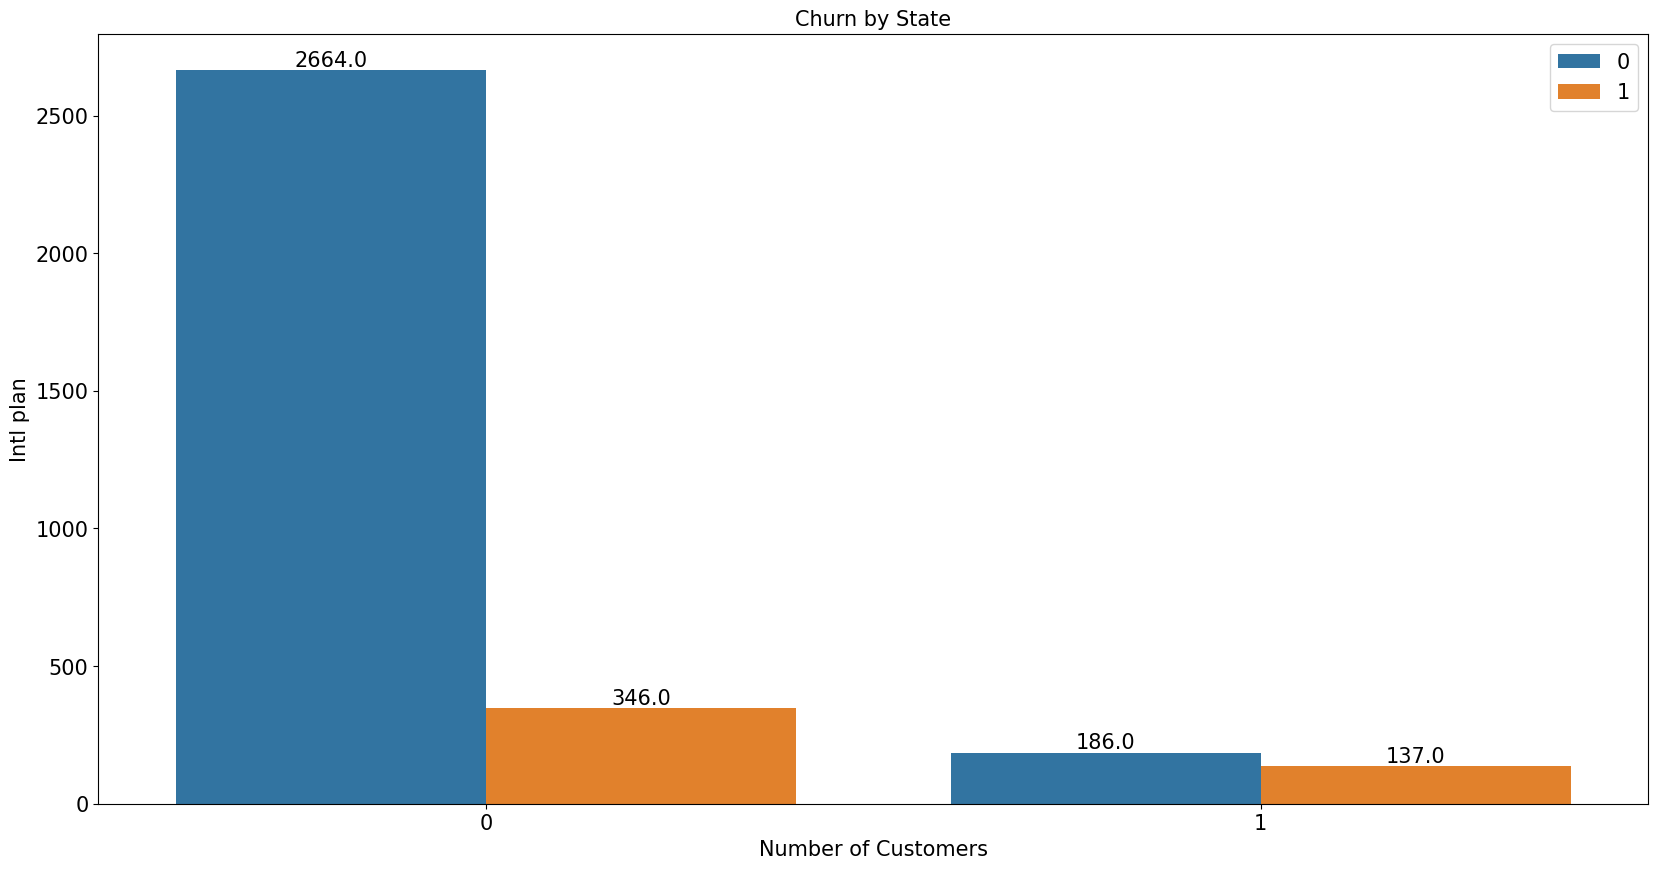

In [73]:
fig, ax =plt.subplots(figsize = (20,10))
sns.countplot(x = 'intl plan', hue = 'churn', data = df, ax = ax)
plt.title('Churn by State', fontsize=15)
plt.xlabel('Number of Customers', fontsize=15)
plt.ylabel('Intl plan', fontsize=15)
plt.legend(fontsize=15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
# Add count labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=15)
# show the plot
plt.show()

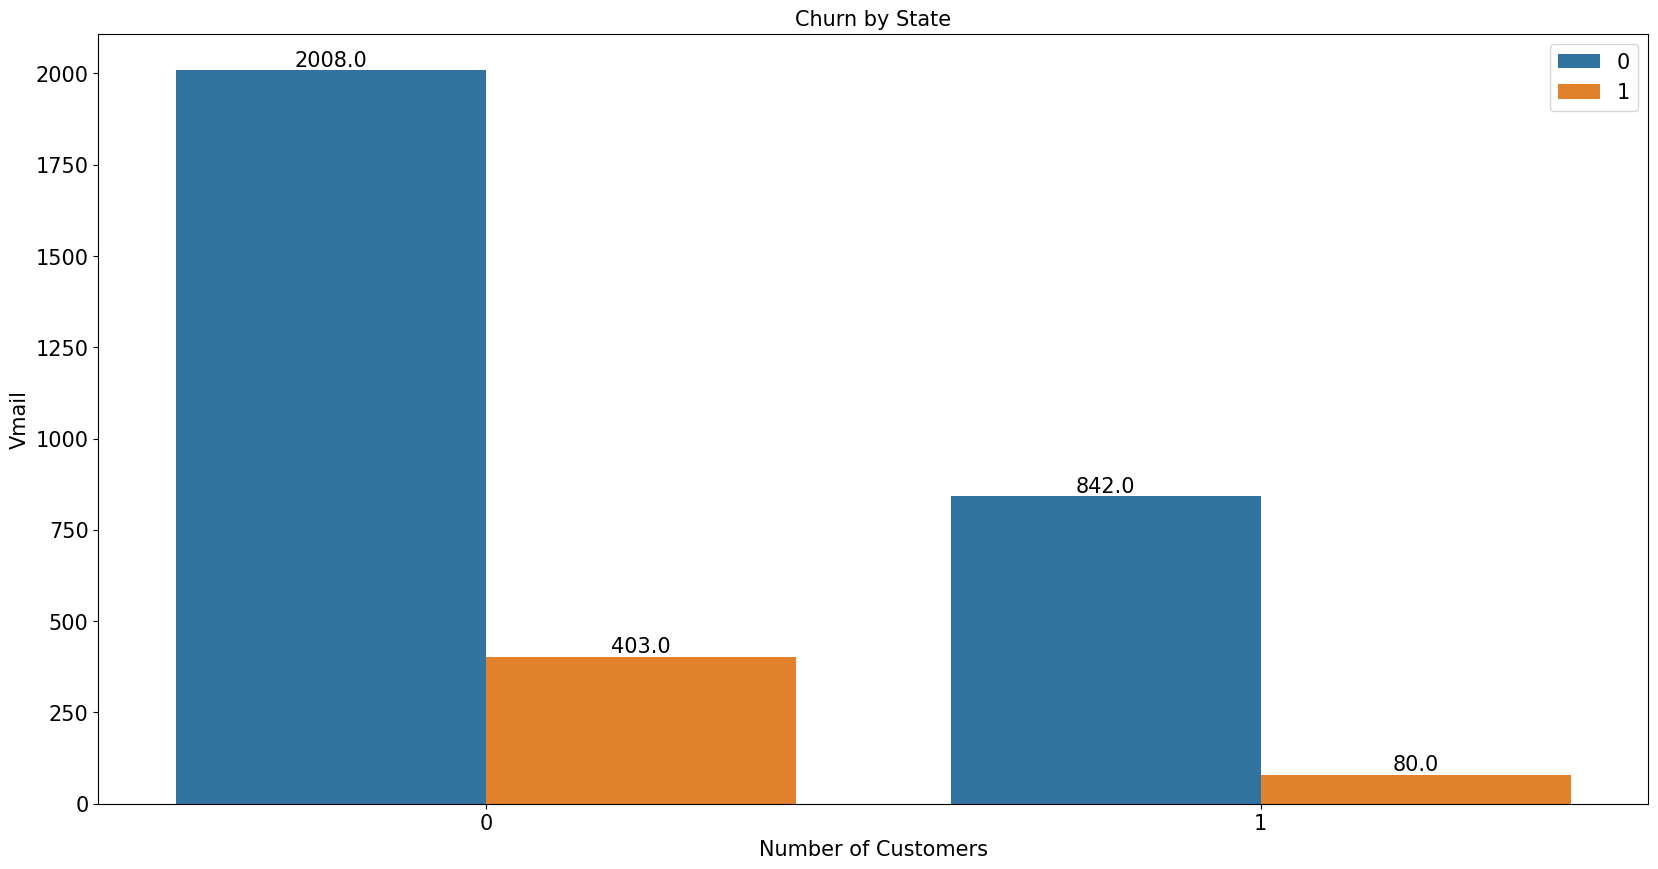

In [68]:
fig, ax =plt.subplots(figsize = (20,10))
sns.countplot(x = 'vmail plan', hue = 'churn', data = df, ax = ax)
plt.title('Churn by State', fontsize=15)
plt.xlabel('Number of Customers', fontsize=15)
plt.ylabel('Vmail', fontsize=15)
plt.legend(fontsize=15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
# Add count labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=15)
# show the plot
plt.show()

In [77]:
corr_matrix = df[['day mins', 'day charge', 'churn']].corr()
print(corr_matrix)

            day mins  day charge     churn
day mins    1.000000    1.000000  0.205151
day charge  1.000000    1.000000  0.205151
churn       0.205151    0.205151  1.000000


<AxesSubplot: >

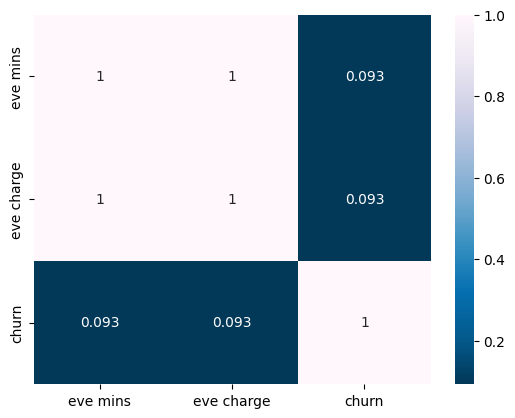

In [86]:
sns.heatmap(corr_matrix, annot=True, cmap='PuBu_r')

            eve mins  eve charge     churn
eve mins    1.000000    1.000000  0.092796
eve charge  1.000000    1.000000  0.092786
churn       0.092796    0.092786  1.000000


<AxesSubplot: >

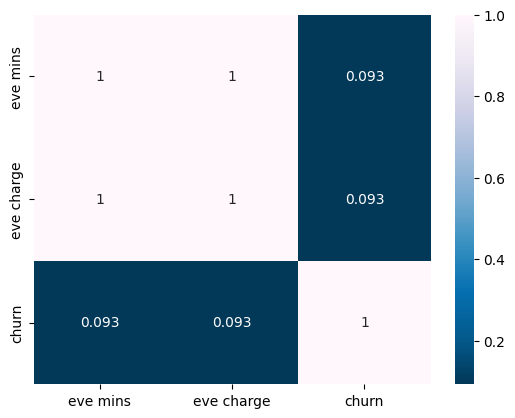

In [87]:
corr_matrix = df[['eve mins', 'eve charge', 'churn']].corr()
print(corr_matrix)
sns.heatmap(corr_matrix, annot=True, cmap='PuBu_r')

              night mins  night charge     churn
night mins      1.000000      0.999999  0.035493
night charge    0.999999      1.000000  0.035496
churn           0.035493      0.035496  1.000000


<AxesSubplot: >

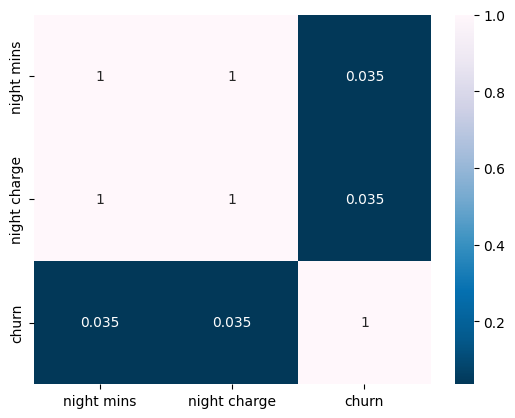

In [88]:
corr_matrix = df[['night mins', 'night charge', 'churn']].corr()
print(corr_matrix)
sns.heatmap(corr_matrix, annot=True, cmap='PuBu_r')

             intl mins  intl charge     churn
intl mins     1.000000     0.999993  0.068239
intl charge   0.999993     1.000000  0.068259
churn         0.068239     0.068259  1.000000


<AxesSubplot: >

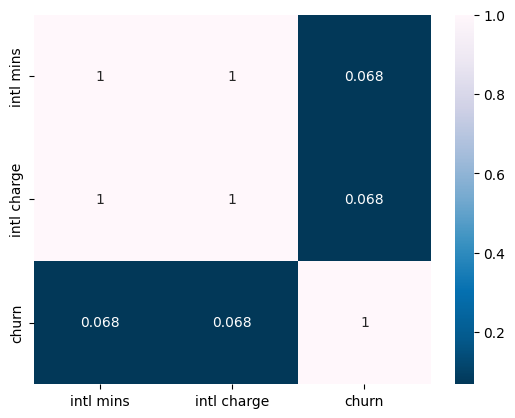

In [90]:
corr_matrix = df[['intl mins', 'intl charge', 'churn']].corr()
print(corr_matrix)
sns.heatmap(corr_matrix, annot=True, cmap='PuBu_r')

[ 6  9  3 15  4  7  1  5  2 11 10 12  8 14 13 20]


In [93]:
df.head()

,state,intl plan,vmail plan,vmail message,day mins,day calls,day charge,eve mins,eve calls,eve charge,night mins,night calls,night charge,intl mins,intl calls,intl charge,custserv calls,churn
0,KS,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


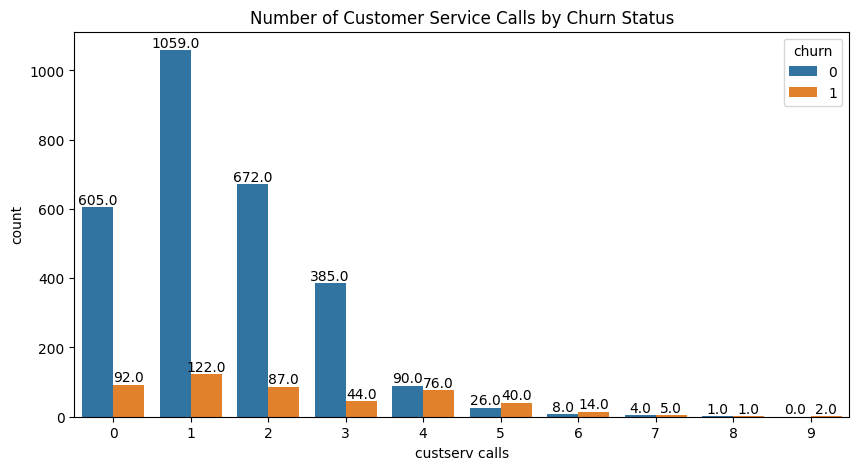

In [102]:
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x='custserv calls', hue='churn', data=df, ax=ax)
ax.set_title('Number of Customer Service Calls by Churn Status')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10)
plt.show()

In [104]:
df['intl calls'].unique()

array([ 3,  5,  7,  6,  4,  2,  9, 19,  1, 10, 15,  8, 11,  0, 12, 13, 18,
       14, 16, 20, 17])

In [109]:
grouped = df.groupby(['custserv calls', 'churn']).size().reset_index(name='count')

# Print the grouped data to check if it has been calculated correctly
grouped

,custserv calls,churn,count
0,0,0,605
1,0,1,92
2,1,0,1059
3,1,1,122
4,2,0,672
5,2,1,87
6,3,0,385
7,3,1,44
8,4,0,90
9,4,1,76


In [108]:
churn_one_group = df[df['churn'] == 1].groupby(['custserv calls']).size().reset_index(name='count')
churn_one_group

,custserv calls,count
0,0,92
1,1,122
2,2,87
3,3,44
4,4,76
5,5,40
6,6,14
7,7,5
8,8,1
9,9,2


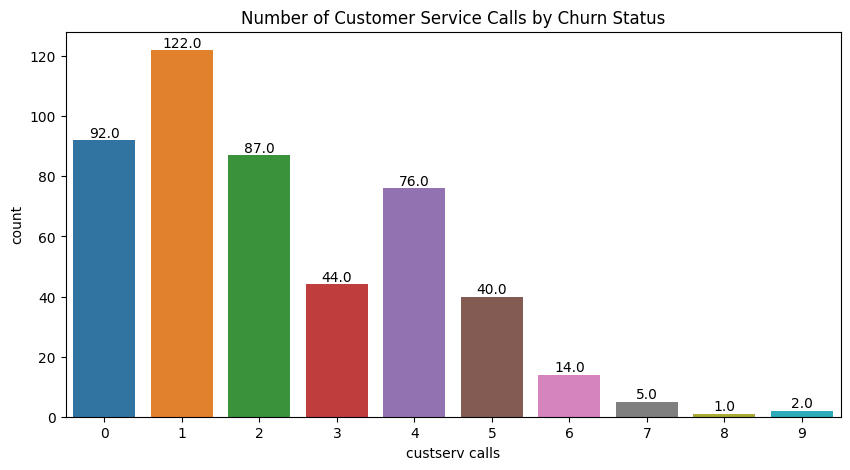

In [111]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x='custserv calls', y = 'count', data=churn_one_group, ax=ax)
ax.set_title('Number of Customer Service Calls by Churn Status')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10)
plt.show()

In [116]:
state_churn_count = df.groupby(['state', 'churn']).size().reset_index(name='count')

# pivot the data to create a separate column for churned and non-churned customers
state_churn_count = state_churn_count.pivot(index='state', columns='churn', values='count')

# fill any missing values with 0
state_churn_count = state_churn_count.fillna(0)

# calculate the total number of customers in each state
state_churn_count['total'] = state_churn_count[0] + state_churn_count[1]

# calculate the churn rate for each state
state_churn_count['churn_rate'] = state_churn_count[1] / state_churn_count['total']

# sort the dataframe by churn rate and display the top 10 states with the highest churn rate
state_churn_count.sort_values(by='churn_rate', ascending=False).head(20)

churn,0,1,total,churn_rate
state,,,,
NJ,50,18,68,0.264706
CA,25,9,34,0.264706
TX,54,18,72,0.250000
MD,53,17,70,0.242857
SC,46,14,60,0.233333
MI,57,16,73,0.219178
MS,51,14,65,0.215385
NV,52,14,66,0.212121
WA,52,14,66,0.212121


In [122]:
avg_churn_rate = state_churn_count['churn_rate'].mean()
avg_churn_rate

0.14492688214643257

In [123]:
state_churn_count['churn_level'] = np.where(state_churn_count['churn_rate'] > avg_churn_rate, 'high churn', 'low churn')

In [124]:
state_churn_count.sort_values(by='churn_rate', ascending=False)

churn,0,1,total,churn_rate,churn_level
state,,,,,
NJ,50,18,68,0.264706,high churn
CA,25,9,34,0.264706,high churn
TX,54,18,72,0.250000,high churn
MD,53,17,70,0.242857,high churn
SC,46,14,60,0.233333,high churn
MI,57,16,73,0.219178,high churn
MS,51,14,65,0.215385,high churn
NV,52,14,66,0.212121,high churn
WA,52,14,66,0.212121,high churn


In [136]:
churn_level_data =state_churn_count.sort_values(by='total', ascending=False)
churn_level_data.head(3)

churn,0,1,total,churn_rate,churn_level
state,,,,,
WV,96,10,106,0.094340,low churn
MN,69,15,84,0.178571,high churn
NY,68,15,83,0.180723,high churn


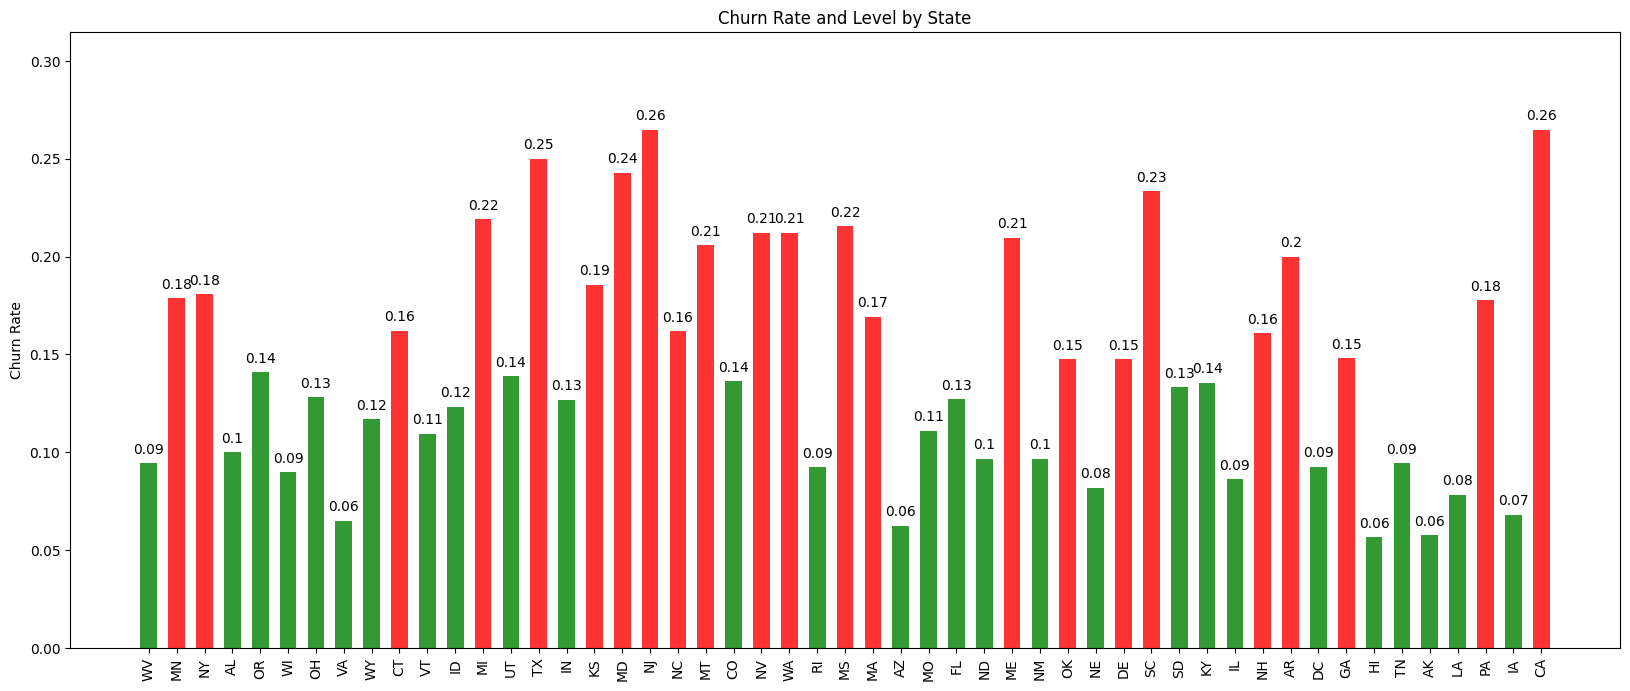

In [175]:
colors = {'low churn': 'green', 'high churn': 'red'}

# Create a vertical bar chart
fig, ax = plt.subplots(figsize=(20, 8))
x_pos = range(len(churn_level_data.index))
ax.bar(x_pos, churn_level_data['churn_rate'], color=[colors[x] for x in churn_level_data['churn_level']], alpha=0.8, width=0.6)
ax.set_xticks(x_pos)
ax.set_xticklabels(churn_level_data.index, rotation=90)
ax.set_ylabel('Churn Rate')
ax.set_title('Churn Rate and Level by State')

# Add text labels
for i, v in enumerate(churn_level_data['churn_rate']):
    ax.text(i, v + 0.005, str(round(v, 2)), ha='center', fontsize=10)

# Set ylim to include all data
ax.set_ylim([0, max(churn_level_data['churn_rate']) + 0.05])

plt.show()

In [176]:
df

,state,intl plan,vmail plan,vmail message,day mins,day calls,day charge,eve mins,eve calls,eve charge,night mins,night calls,night charge,intl mins,intl calls,intl charge,custserv calls,churn
0,KS,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,WV,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,RI,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,CT,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


/tmp/ipykernel_901201/1178005048.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr_matrix = df.corr()


<AxesSubplot: >

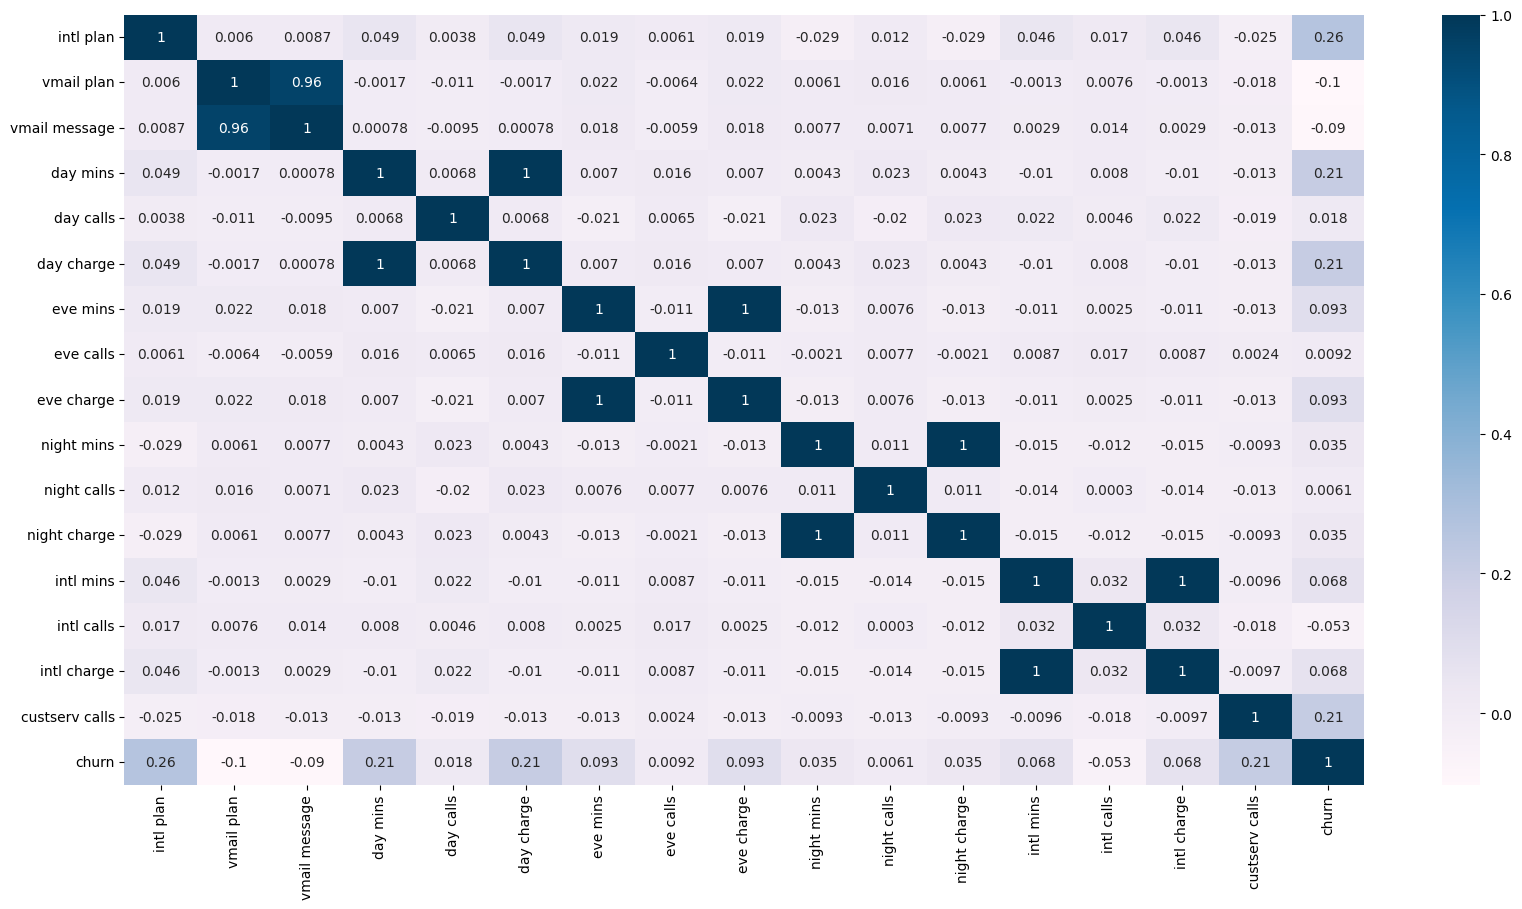

In [184]:
df_corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df_corr_matrix, cmap = 'PuBu', annot = True)

In [185]:
df.columns.unique()

Index(['state', 'intl plan', 'vmail plan', 'vmail message', 'day mins',
       'day calls', 'day charge', 'eve mins', 'eve calls', 'eve charge',
       'night mins', 'night calls', 'night charge', 'intl mins', 'intl calls',
       'intl charge', 'custserv calls', 'churn'],
      dtype='object')

In [186]:
for i, col in enumerate(df.columns):
    df.loc[:, 'total_charge'] = df.loc[:, 'day charge'] + df.loc[:, 'eve charge'] + df.loc[:, 'night charge'] + df.loc[:, 'intl charge']

In [188]:
df.head()

,state,intl plan,vmail plan,vmail message,day mins,day calls,day charge,eve mins,eve calls,eve charge,night mins,night calls,night charge,intl mins,intl calls,intl charge,custserv calls,churn,total_charge
0,KS,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,75.56
1,OH,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,59.24
2,NJ,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,62.29
3,OH,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,66.80
4,OK,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,52.09


In [189]:
for i, col in enumerate(df.columns):
    df.loc[:, 'total_calls'] = df.loc[:, 'day calls'] + df.loc[:, 'eve calls'] + df.loc[:, 'night calls'] + df.loc[:, 'intl calls']

In [190]:
df

,state,intl plan,vmail plan,vmail message,day mins,day calls,day charge,eve mins,eve calls,eve charge,night mins,night calls,night charge,intl mins,intl calls,intl charge,custserv calls,churn,total_charge,total_calls
0,KS,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,75.56,303
1,OH,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,59.24,332
2,NJ,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,62.29,333
3,OH,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,66.80,255
4,OK,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,52.09,359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0,60.10,292
3329,WV,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0,63.53,239
3330,RI,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0,67.74,264
3331,CT,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0,57.53,336


In [191]:
df['total_calls'].mean()

305.1371137113711

In [192]:
df['total_charge'].mean()

59.44975397539754

Churn 0:
  Q1: 52.22
  Median: 58.92
  Q3: 65.1375
  IQR: 12.917500000000004
  Whisker Min: 32.86
  Whisker Max: 84.30000000000001
Churn 1:
  Q1: 53.425
  Median: 66.91000000000001
  Q3: 76.655
  IQR: 23.230000000000004
  Whisker Min: 22.93
  Whisker Max: 96.15


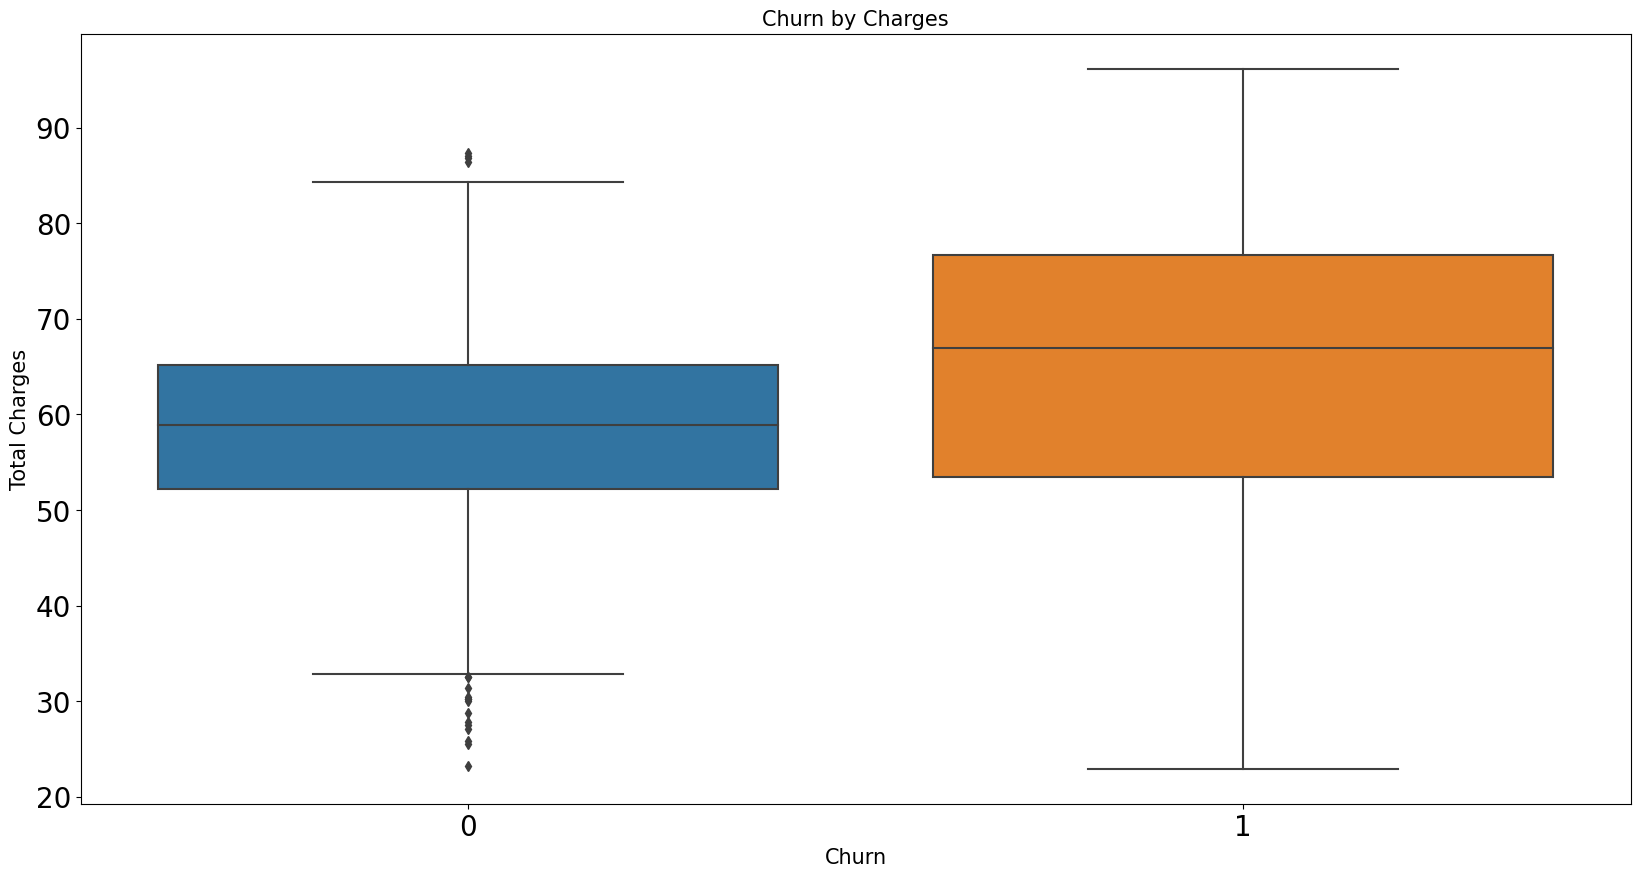

In [205]:
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(x = 'churn', y = 'total_charge', data = df)
plt.title('Churn by Charges', fontsize=15)
plt.xlabel('Churn', fontsize=15)
plt.ylabel('Total Charges', fontsize=15)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

# get the numerical values
churn_0 = df[df['churn'] == 0]['total_charge']
churn_1 = df[df['churn'] == 1]['total_charge']
q1_0, median_0, q3_0 = np.percentile(churn_0, [25, 50, 75])
q1_1, median_1, q3_1 = np.percentile(churn_1, [25, 50, 75])
iqr_0 = q3_0 - q1_0
iqr_1 = q3_1 - q1_1
whisker_min_0 = churn_0[churn_0 >= (q1_0 - 1.5*iqr_0)].min()
whisker_max_0 = churn_0[churn_0 <= (q3_0 + 1.5*iqr_0)].max()
whisker_min_1 = churn_1[churn_1 >= (q1_1 - 1.5*iqr_1)].min()
whisker_max_1 = churn_1[churn_1 <= (q3_1 + 1.5*iqr_1)].max()

print("Churn 0:")
print("  Q1:", q1_0)
print("  Median:", median_0)
print("  Q3:", q3_0)
print("  IQR:", iqr_0)
print("  Whisker Min:", whisker_min_0)
print("  Whisker Max:", whisker_max_0)

print("Churn 1:")
print("  Q1:", q1_1)
print("  Median:", median_1)
print("  Q3:", q3_1)
print("  IQR:", iqr_1)
print("  Whisker Min:", whisker_min_1)
print("  Whisker Max:", whisker_max_1)
plt.show()

Churn 0:
  Q1: 282.0
  Median: 305.0
  Q3: 328.0
  IQR: 46.0
  Whisker Min: 213
  Whisker Max: 397
Churn 1:
  Q1: 283.0
  Median: 306.0
  Q3: 331.0
  IQR: 48.0
  Whisker Min: 213
  Whisker Max: 398


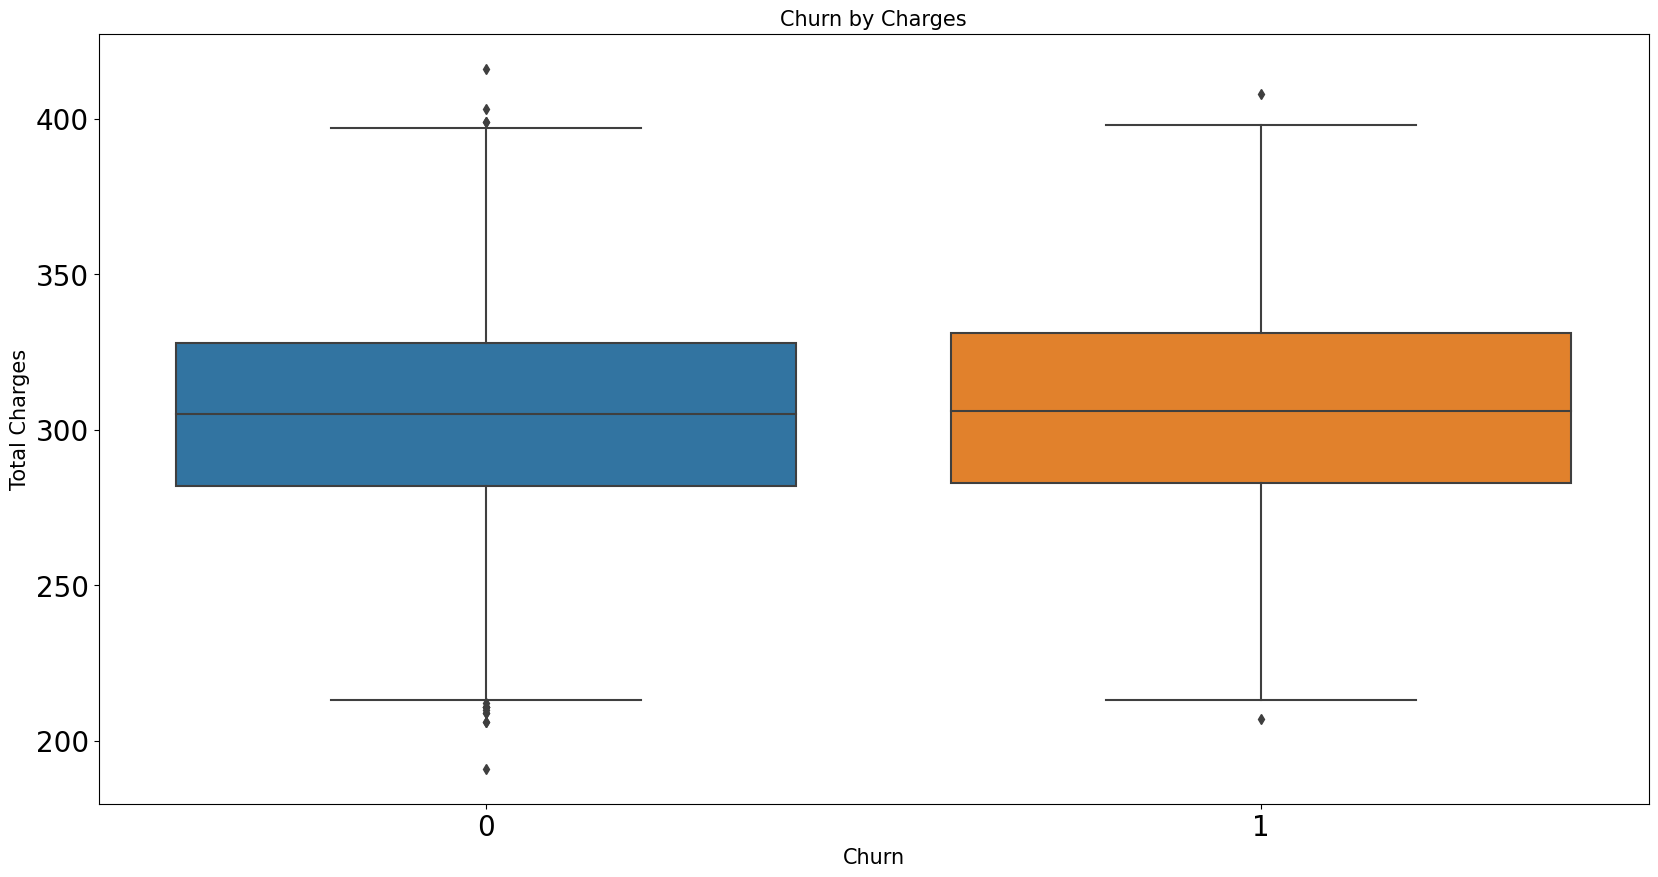

In [217]:
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(x = 'churn', y = 'total_calls', data = df)
plt.title('Churn by Charges', fontsize=15)
plt.xlabel('Churn', fontsize=15)
plt.ylabel('Total Charges', fontsize=15)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
churn_0 = df[df['churn'] == 0]['total_calls']
churn_1 = df[df['churn'] == 1]['total_calls']
q1_0, median_0, q3_0 = np.percentile(churn_0, [25, 50, 75])
q1_1, median_1, q3_1 = np.percentile(churn_1, [25, 50, 75])
iqr_0 = q3_0 - q1_0
iqr_1 = q3_1 - q1_1
whisker_min_0 = churn_0[churn_0 >= (q1_0 - 1.5*iqr_0)].min()
whisker_max_0 = churn_0[churn_0 <= (q3_0 + 1.5*iqr_0)].max()
whisker_min_1 = churn_1[churn_1 >= (q1_1 - 1.5*iqr_1)].min()
whisker_max_1 = churn_1[churn_1 <= (q3_1 + 1.5*iqr_1)].max()

print("Churn 0:")
print("  Q1:", q1_0)
print("  Median:", median_0)
print("  Q3:", q3_0)
print("  IQR:", iqr_0)
print("  Whisker Min:", whisker_min_0)
print("  Whisker Max:", whisker_max_0)

print("Churn 1:")
print("  Q1:", q1_1)
print("  Median:", median_1)
print("  Q3:", q3_1)
print("  IQR:", iqr_1)
print("  Whisker Min:", whisker_min_1)
print("  Whisker Max:", whisker_max_1)

plt.show()

In [200]:
for i, col in enumerate(df.columns):
    df.loc[:,'charge_call'] = df.loc[:, 'total_calls'] / df.loc[:,'total_charge']

Churn 0:
  Q1: 4.550493428282631
  Median: 5.208963429587781
  Q3: 5.957648575399068
  IQR: 1.4071551471164367
  Whisker Min: 2.8987706784033995
  Whisker Max: 8.051235132662399
Churn 1:
  Q1: 3.984201997799326
  Median: 4.618893746436039
  Q3: 5.761671618868581
  IQR: 1.777469621069255
  Whisker Min: 2.440701271914747
  Whisker Max: 8.390194591862523


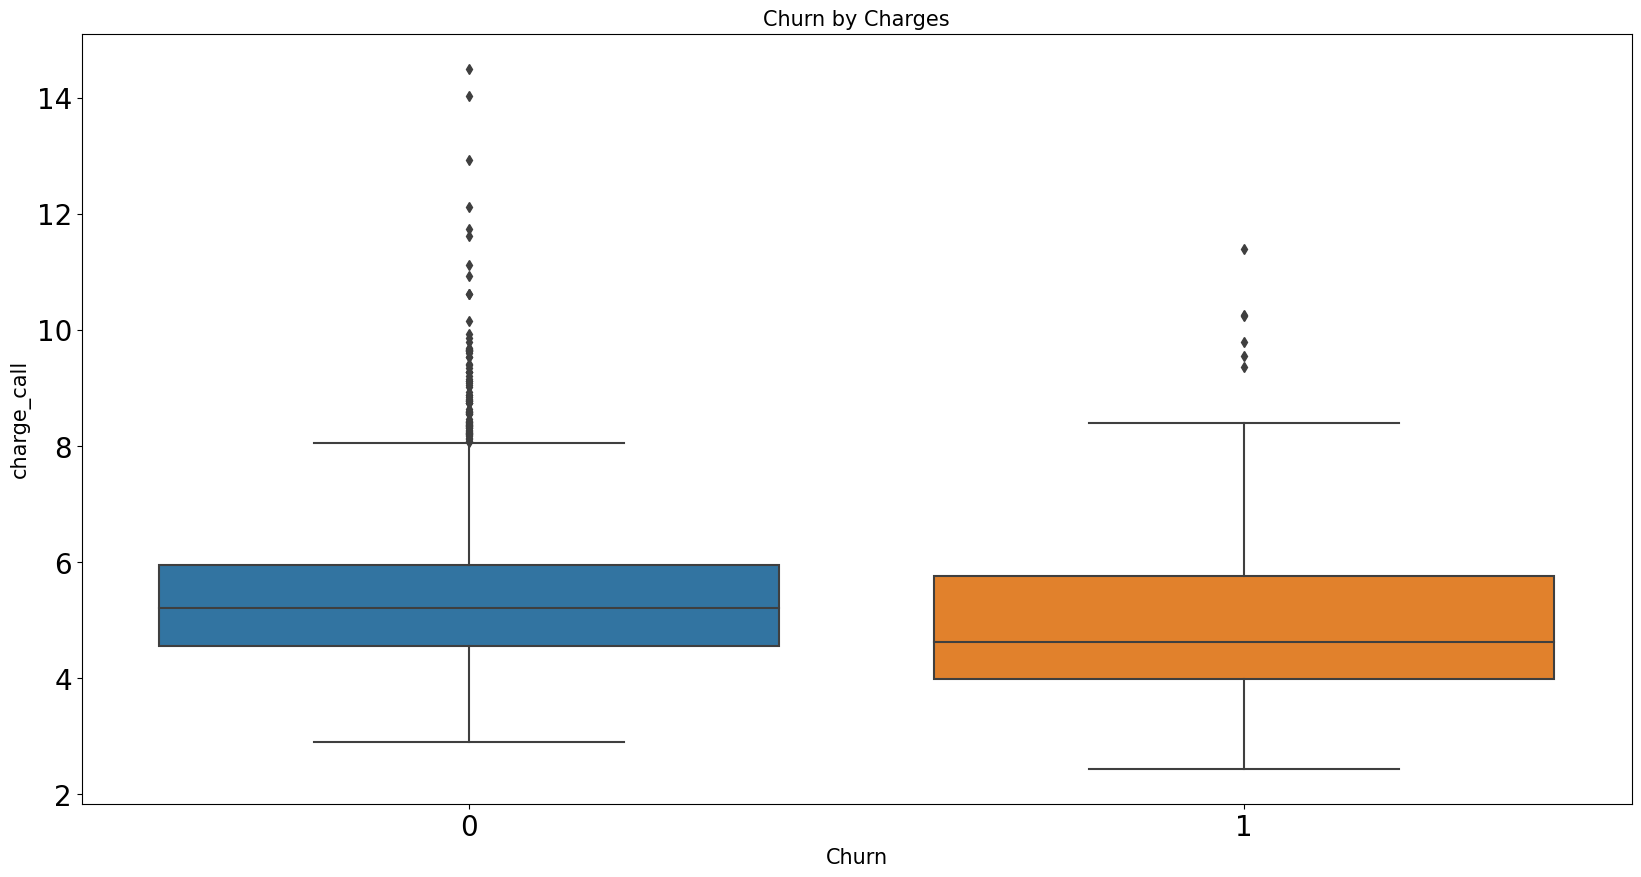

In [219]:
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(x = 'churn', y = 'charge_call', data = df)
plt.title('Churn by Charges', fontsize=15)
plt.xlabel('Churn', fontsize=15)
plt.ylabel('charge_call', fontsize=15)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
churn_0 = df[df['churn'] == 0]['charge_call']
churn_1 = df[df['churn'] == 1]['charge_call']
q1_0, median_0, q3_0 = np.percentile(churn_0, [25, 50, 75])
q1_1, median_1, q3_1 = np.percentile(churn_1, [25, 50, 75])
iqr_0 = q3_0 - q1_0
iqr_1 = q3_1 - q1_1
whisker_min_0 = churn_0[churn_0 >= (q1_0 - 1.5*iqr_0)].min()
whisker_max_0 = churn_0[churn_0 <= (q3_0 + 1.5*iqr_0)].max()
whisker_min_1 = churn_1[churn_1 >= (q1_1 - 1.5*iqr_1)].min()
whisker_max_1 = churn_1[churn_1 <= (q3_1 + 1.5*iqr_1)].max()

print("Churn 0:")
print("  Q1:", q1_0)
print("  Median:", median_0)
print("  Q3:", q3_0)
print("  IQR:", iqr_0)
print("  Whisker Min:", whisker_min_0)
print("  Whisker Max:", whisker_max_0)

print("Churn 1:")
print("  Q1:", q1_1)
print("  Median:", median_1)
print("  Q3:", q3_1)
print("  IQR:", iqr_1)
print("  Whisker Min:", whisker_min_1)
print("  Whisker Max:", whisker_max_1)
plt.show()

In [204]:
df

,state,intl plan,vmail plan,vmail message,day mins,day calls,day charge,eve mins,eve calls,eve charge,...,night calls,night charge,intl mins,intl calls,intl charge,custserv calls,churn,total_charge,total_calls,charge_call
0,KS,0,1,25,265.1,110,45.07,197.4,99,16.78,...,91,11.01,10.0,3,2.70,1,0,75.56,303,4.010058
1,OH,0,1,26,161.6,123,27.47,195.5,103,16.62,...,103,11.45,13.7,3,3.70,1,0,59.24,332,5.604321
2,NJ,0,0,0,243.4,114,41.38,121.2,110,10.30,...,104,7.32,12.2,5,3.29,0,0,62.29,333,5.345962
3,OH,1,0,0,299.4,71,50.90,61.9,88,5.26,...,89,8.86,6.6,7,1.78,2,0,66.80,255,3.817365
4,OK,1,0,0,166.7,113,28.34,148.3,122,12.61,...,121,8.41,10.1,3,2.73,3,0,52.09,359,6.891918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,0,1,36,156.2,77,26.55,215.5,126,18.32,...,83,12.56,9.9,6,2.67,2,0,60.10,292,4.858569
3329,WV,0,0,0,231.1,57,39.29,153.4,55,13.04,...,123,8.61,9.6,4,2.59,3,0,63.53,239,3.762002
3330,RI,0,0,0,180.8,109,30.74,288.8,58,24.55,...,91,8.64,14.1,6,3.81,2,0,67.74,264,3.897254
3331,CT,1,0,0,213.8,105,36.35,159.6,84,13.57,...,137,6.26,5.0,10,1.35,2,0,57.53,336,5.840431


In [206]:
df.columns.unique()

Index(['state', 'intl plan', 'vmail plan', 'vmail message', 'day mins',
       'day calls', 'day charge', 'eve mins', 'eve calls', 'eve charge',
       'night mins', 'night calls', 'night charge', 'intl mins', 'intl calls',
       'intl charge', 'custserv calls', 'churn', 'total_charge', 'total_calls',
       'charge_call'],
      dtype='object')

In [207]:
columns_to_drop = ['day mins', 'day calls', 'day charge', 'eve mins', 'eve calls', 'eve charge','night mins', 'night calls', 'night charge', 'intl mins', 'intl calls', 'intl charge']

df = df.drop(columns_to_drop, axis=1)


In [215]:
df = df.drop('vmail message', axis =1)

In [216]:
df

,state,intl plan,vmail plan,custserv calls,churn,total_charge,total_calls,charge_call
0,KS,0,1,1,0,75.56,303,4.010058
1,OH,0,1,1,0,59.24,332,5.604321
2,NJ,0,0,0,0,62.29,333,5.345962
3,OH,1,0,2,0,66.80,255,3.817365
4,OK,1,0,3,0,52.09,359,6.891918
...,...,...,...,...,...,...,...,...
3328,AZ,0,1,2,0,60.10,292,4.858569
3329,WV,0,0,3,0,63.53,239,3.762002
3330,RI,0,0,2,0,67.74,264,3.897254
3331,CT,1,0,2,0,57.53,336,5.840431


In [220]:
cols = ['total_calls', 'charge_call']
df = df.drop(cols, axis =1)

In [221]:
df

,state,intl plan,vmail plan,custserv calls,churn,total_charge
0,KS,0,1,1,0,75.56
1,OH,0,1,1,0,59.24
2,NJ,0,0,0,0,62.29
3,OH,1,0,2,0,66.80
4,OK,1,0,3,0,52.09
...,...,...,...,...,...,...
3328,AZ,0,1,2,0,60.10
3329,WV,0,0,3,0,63.53
3330,RI,0,0,2,0,67.74
3331,CT,1,0,2,0,57.53


/tmp/ipykernel_901201/1779025963.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = df.corr()


<AxesSubplot: >

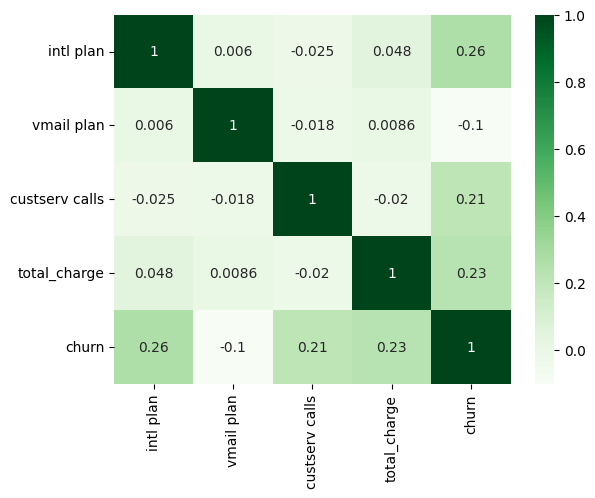

In [225]:
cols = ['state', 'intl plan', 'vmail plan', 'custserv calls', 'total_charge', 'churn']
df = df[cols]
corr_df = df.corr()
sns.heatmap(corr_df, cmap = 'Greens', annot = True)

- Based on these results, it seems that the strongest predictor of churn is whether or not the customer has an international plan, with a positive correlation of 0.26 
        **This suggests that customers who have an international plan are more likely to churn than those who do not**


- On the other hand, having a voicemail plan appears to have a weak negative correlation with churn, indicating that **customers with a voicemail plan may be slightly less likely to churn**


- Additionally, the number of customer service calls and the total charge also show moderate positive correlations with churn, **suggesting that customers who make more customer service calls or have higher total charges are more likely to churn**


**Overall, it may be useful to focus on these factors when developing strategies to reduce churn, such as providing better customer service or offering incentives to customers with high total charges**

In [239]:
churn_level_data= churn_level_data.reset_index()

In [236]:
df

,state,intl plan,vmail plan,custserv calls,total_charge,churn
0,KS,0,1,1,75.56,0
1,OH,0,1,1,59.24,0
2,NJ,0,0,0,62.29,0
3,OH,1,0,2,66.80,0
4,OK,1,0,3,52.09,0
...,...,...,...,...,...,...
3328,AZ,0,1,2,60.10,0
3329,WV,0,0,3,63.53,0
3330,RI,0,0,2,67.74,0
3331,CT,1,0,2,57.53,0


In [241]:
churn_level_data = churn_level_data.set_index('state')

# merge the two tables
merged_table = pd.merge(churn_level_data, df, on='state')

In [242]:
merged_table

,state,0,1,total,churn_rate,churn_level,intl plan,vmail plan,custserv calls,total_charge,churn
0,WV,96,10,106,0.094340,low churn,1,1,0,80.54,0
1,WV,96,10,106,0.094340,low churn,0,0,1,73.63,0
2,WV,96,10,106,0.094340,low churn,0,0,1,65.60,0
3,WV,96,10,106,0.094340,low churn,1,1,4,67.01,0
4,WV,96,10,106,0.094340,low churn,0,0,3,63.95,0
...,...,...,...,...,...,...,...,...,...,...,...
3328,CA,25,9,34,0.264706,high churn,0,1,1,55.32,0
3329,CA,25,9,34,0.264706,high churn,0,0,1,55.03,0
3330,CA,25,9,34,0.264706,high churn,0,0,0,63.66,0
3331,CA,25,9,34,0.264706,high churn,0,0,0,44.07,0


/tmp/ipykernel_901201/2296559353.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_merge = merged_table.corr()


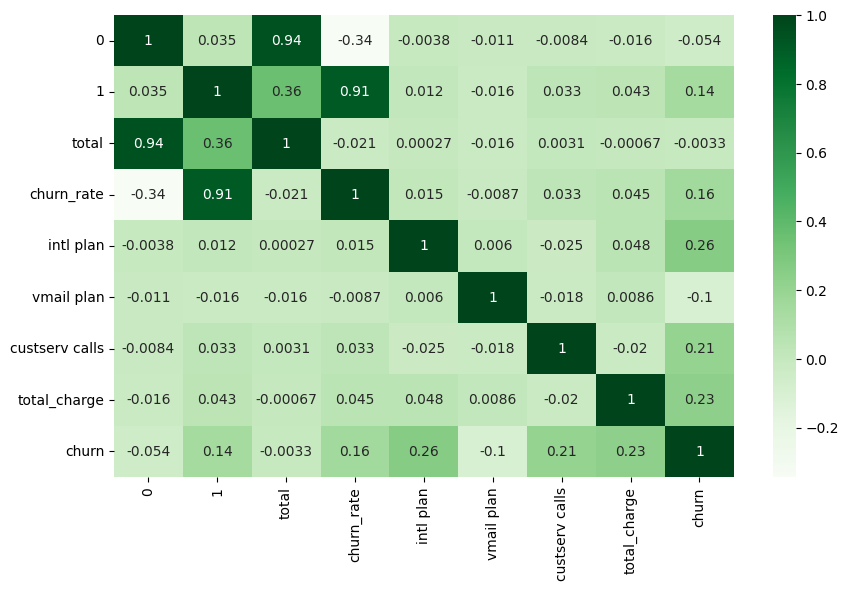

In [245]:
fig, ax = plt.subplots(figsize = (10,6))
corr_merge = merged_table.corr()
sns.heatmap(corr_merge, cmap = 'Greens', annot = True, ax = ax)
plt.show()

In [249]:
X_data_1 = merged_table.drop(['state',0, 1,'total', 'churn_rate', 'churn_level', 'churn'], axis = 1)
y_data_1 = merged_table['churn']

In [250]:
X_data_1

,intl plan,vmail plan,custserv calls,total_charge
0,1,1,0,80.54
1,0,0,1,73.63
2,0,0,1,65.60
3,1,1,4,67.01
4,0,0,3,63.95
...,...,...,...,...
3328,0,1,1,55.32
3329,0,0,1,55.03
3330,0,0,0,63.66
3331,0,0,0,44.07


In [251]:
y_data_1

0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    1
Name: churn, Length: 3333, dtype: int64

In [252]:
print(X_data_1['total_charge'].min())

22.93


In [253]:
print(X_data_1['total_charge'].max())

96.15


In [254]:
print(X_data_1['total_charge'].mean())

59.44975397539754


In [255]:
## Model Training:

In [258]:
merged_table['churn_level'] = merged_table['churn_level'].replace({'low churn': 0, 'high churn': 1})

In [259]:
merged_table

,state,0,1,total,churn_rate,churn_level,intl plan,vmail plan,custserv calls,total_charge,churn
0,WV,96,10,106,0.094340,0,1,1,0,80.54,0
1,WV,96,10,106,0.094340,0,0,0,1,73.63,0
2,WV,96,10,106,0.094340,0,0,0,1,65.60,0
3,WV,96,10,106,0.094340,0,1,1,4,67.01,0
4,WV,96,10,106,0.094340,0,0,0,3,63.95,0
...,...,...,...,...,...,...,...,...,...,...,...
3328,CA,25,9,34,0.264706,1,0,1,1,55.32,0
3329,CA,25,9,34,0.264706,1,0,0,1,55.03,0
3330,CA,25,9,34,0.264706,1,0,0,0,63.66,0
3331,CA,25,9,34,0.264706,1,0,0,0,44.07,0


/tmp/ipykernel_901201/2296559353.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_merge = merged_table.corr()


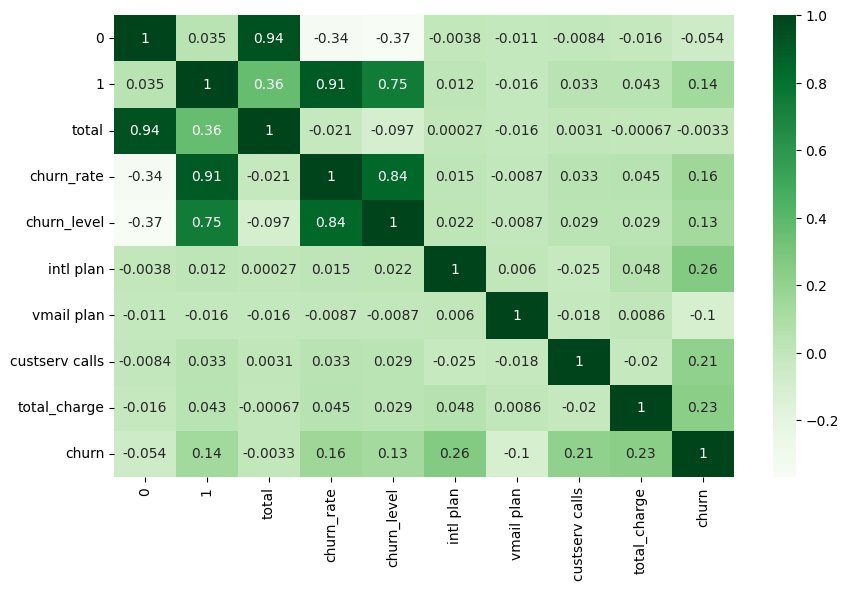

In [260]:
fig, ax = plt.subplots(figsize = (10,6))
corr_merge = merged_table.corr()
sns.heatmap(corr_merge, cmap = 'Greens', annot = True, ax = ax)
plt.show()

In [267]:
# Count the occurrences of 'WN' in the 'state' column
state_count = (df['state'] == 'KS').sum()

In [268]:
state_count

70

In [263]:
df['state'].unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [283]:
state_counts = df['state'].value_counts()
state_counts.head()

WV    106
MN     84
NY     83
AL     80
WI     78
Name: state, dtype: int64

In [270]:
state_services_churn = merged_table.groupby(['state', 'total'])['churn'].mean().reset_index()

In [274]:
state_services_churn

,state,total,churn
0,AK,52,0.057692
1,AL,80,0.100000
2,AR,55,0.200000
3,AZ,64,0.062500
4,CA,34,0.264706
5,CO,66,0.136364
6,CT,74,0.162162
7,DC,54,0.092593
8,DE,61,0.147541
9,FL,63,0.126984


In [276]:
state_services_churn.sort_values('total', ascending = False).head(3)

,state,total,churn
49,WV,106,0.094340
23,MN,84,0.178571
34,NY,83,0.180723


In [277]:
state_services_churn['churn'].mean()

0.14492688214643257

In [281]:
above_threshold = (state_services_churn['churn'] > 0.14).sum()
below_threshold = (state_services_churn['churn'] <= 0.14).sum()

In [282]:
print(above_threshold)
print(below_threshold)

24
27


In [284]:
merged_table

,state,0,1,total,churn_rate,churn_level,intl plan,vmail plan,custserv calls,total_charge,churn
0,WV,96,10,106,0.094340,0,1,1,0,80.54,0
1,WV,96,10,106,0.094340,0,0,0,1,73.63,0
2,WV,96,10,106,0.094340,0,0,0,1,65.60,0
3,WV,96,10,106,0.094340,0,1,1,4,67.01,0
4,WV,96,10,106,0.094340,0,0,0,3,63.95,0
...,...,...,...,...,...,...,...,...,...,...,...
3328,CA,25,9,34,0.264706,1,0,1,1,55.32,0
3329,CA,25,9,34,0.264706,1,0,0,1,55.03,0
3330,CA,25,9,34,0.264706,1,0,0,0,63.66,0
3331,CA,25,9,34,0.264706,1,0,0,0,44.07,0


In [285]:
average_churn = merged_table['churn_rate'].mean()


0.14491449144914492

In [286]:
merged_table['is_high_churn_region'] = merged_table['churn_rate'].apply(lambda x: 1 if x > average_churn else 0)

In [287]:
merged_table

,state,0,1,total,churn_rate,churn_level,intl plan,vmail plan,custserv calls,total_charge,churn,is_high_churn_region
0,WV,96,10,106,0.094340,0,1,1,0,80.54,0,0
1,WV,96,10,106,0.094340,0,0,0,1,73.63,0,0
2,WV,96,10,106,0.094340,0,0,0,1,65.60,0,0
3,WV,96,10,106,0.094340,0,1,1,4,67.01,0,0
4,WV,96,10,106,0.094340,0,0,0,3,63.95,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3328,CA,25,9,34,0.264706,1,0,1,1,55.32,0,1
3329,CA,25,9,34,0.264706,1,0,0,1,55.03,0,1
3330,CA,25,9,34,0.264706,1,0,0,0,63.66,0,1
3331,CA,25,9,34,0.264706,1,0,0,0,44.07,0,1


In [288]:
cols = ['intl plan', 'custserv calls', 'total_charge', 'is_high_churn_region','churn']
merged_table = merged_table[cols]

In [289]:
merged_table

,intl plan,custserv calls,total_charge,is_high_churn_region,churn
0,1,0,80.54,0,0
1,0,1,73.63,0,0
2,0,1,65.60,0,0
3,1,4,67.01,0,0
4,0,3,63.95,0,0
...,...,...,...,...,...
3328,0,1,55.32,1,0
3329,0,1,55.03,1,0
3330,0,0,63.66,1,0
3331,0,0,44.07,1,0


In [290]:
merged_table['total_charge'].mean()

59.44975397539754

In [291]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# assuming your continuous feature is in a column named "total_charge"
continuous_feature = merged_table['total_charge'].values.reshape(-1,1)

# scale using MinMaxScaler
scaler1 = MinMaxScaler()
scaled_feature1 = scaler1.fit_transform(continuous_feature)

# scale using StandardScaler
scaler2 = StandardScaler()
scaled_feature2 = scaler2.fit_transform(continuous_feature)

In [292]:
merged_table['scaled_total_charge_minmax'] = scaled_feature1
merged_table['scaled_total_charge_std'] = scaled_feature2

/tmp/ipykernel_901201/1019320237.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_table['scaled_total_charge_minmax'] = scaled_feature1
/tmp/ipykernel_901201/1019320237.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_table['scaled_total_charge_std'] = scaled_feature2


In [293]:
merged_table

,intl plan,custserv calls,total_charge,is_high_churn_region,churn,scaled_total_charge_minmax,scaled_total_charge_std
0,1,0,80.54,0,0,0.786807,2.008464
1,0,1,73.63,0,0,0.692434,1.350412
2,0,1,65.60,0,0,0.582764,0.585699
3,1,4,67.01,0,0,0.602021,0.719976
4,0,3,63.95,0,0,0.560229,0.428567
...,...,...,...,...,...,...,...
3328,0,1,55.32,1,0,0.442365,-0.393284
3329,0,1,55.03,1,0,0.438405,-0.420901
3330,0,0,63.66,1,0,0.556269,0.400950
3331,0,0,44.07,1,0,0.288719,-1.464643


In [294]:
merged_table.drop('total_charge', axis=1, inplace=True)

/tmp/ipykernel_901201/2949708098.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_table.drop('total_charge', axis=1, inplace=True)


In [295]:
merged_table

,intl plan,custserv calls,is_high_churn_region,churn,scaled_total_charge_minmax,scaled_total_charge_std
0,1,0,0,0,0.786807,2.008464
1,0,1,0,0,0.692434,1.350412
2,0,1,0,0,0.582764,0.585699
3,1,4,0,0,0.602021,0.719976
4,0,3,0,0,0.560229,0.428567
...,...,...,...,...,...,...
3328,0,1,1,0,0.442365,-0.393284
3329,0,1,1,0,0.438405,-0.420901
3330,0,0,1,0,0.556269,0.400950
3331,0,0,1,0,0.288719,-1.464643


In [296]:
cols = ['intl plan', 'custserv calls','is_high_churn_region', 'scaled_total_charge_minmax', 'scaled_total_charge_std','churn']
merged_table = merged_table[cols]

In [297]:
merged_table

,intl plan,custserv calls,is_high_churn_region,scaled_total_charge_minmax,scaled_total_charge_std,churn
0,1,0,0,0.786807,2.008464,0
1,0,1,0,0.692434,1.350412,0
2,0,1,0,0.582764,0.585699,0
3,1,4,0,0.602021,0.719976,0
4,0,3,0,0.560229,0.428567,0
...,...,...,...,...,...,...
3328,0,1,1,0.442365,-0.393284,0
3329,0,1,1,0.438405,-0.420901,0
3330,0,0,1,0.556269,0.400950,0
3331,0,0,1,0.288719,-1.464643,0


## FINALLY EDA DONE